In [1]:
# Uhm yeah: Euler discretization of geometric Brownian motion. (Particles suspended in gas bouncing?)
%%time
import random
from math import exp, sqrt

S0 = 100
r = 0.05
T = 1.0
sigma = 0.2

values = []

for _ in range(1000000):
    ST = S0 * exp((r - 0.5 * sigma ** 2) * T + sigma * random.gauss(0, 1) * sqrt(T))
    values.append(ST)

CPU times: total: 359 ms
Wall time: 731 ms


In [2]:
# This shows how numpy avoids Python's slow "loops" and uses code that runs closer to the metal to improve efficiency.
%%time
import numpy as np

S0 = 100
r = 0.05
T = 1.0
sigma = 0.2

ST = S0 * np.exp((r - 0.5 * sigma ** 2) * T + sigma * np.random.standard_normal(1000000) * np.sqrt(T))

CPU times: total: 31.2 ms
Wall time: 461 ms


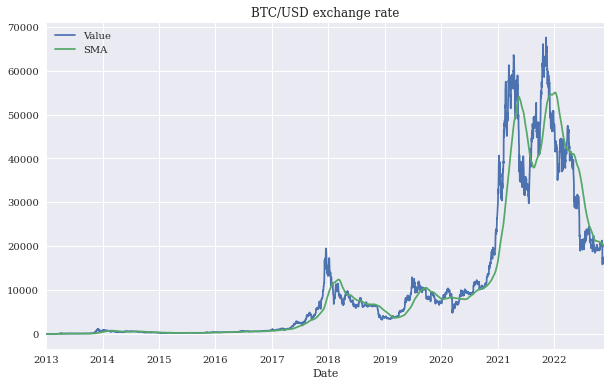

In [8]:
# Retrieve data about the historical exchange rate of bitcoin in USD
%matplotlib inline
from pylab import mpl, plt
import configparser
import quandl as q

# plot setup
plt.style.use('seaborn')
mpl.rcParams['savefig.dpi'] = 300
mpl.rcParams['font.family'] = 'serif'

# read in the api key (quandl now nasdaq)
c = configparser.ConfigParser()
c.read('./pyalgo.cfg')

# Pull down BCHAIN/MKPRU and plots the value alongside the SMA.
q.ApiConfig.api_key = c['quandl']['api_key']
d = q.get('BCHAIN/MKPRU')
d['SMA'] = d['Value'].rolling(100).mean()
d.loc['2013-1-1':].plot(title='BTC/USD exchange rate', figsize=(10, 6));

# Reading: Hilpisch (2018), McKinney (2017), and VanderPlas (2016)
Hilpisch, O'Reilly Media. Python for Finance
McKinney, Wes. 2017. Python for Data Analysis: Data Wrangling with Pandas, NumPy, and IPython. 2nd ed. Sebastopol: O’Reilly.
VanderPlas, Jake. 2016. Python Data Science Handbook: Essential Tools for Working with Data. Sebastopol: O’Reilly.

See the book by Kissel (2013) for an overview of topics related to algorithmic trading, the book by Chan (2013) for an in-depth discussion of momentum and mean-reversion strategies, or the book by Narang (2013) for a coverage of quantitative and HFT trading in general.

Kissel, Robert. 2013. The Science of Algorithmic Trading and Portfolio Management. Amsterdam et al: Elsevier/Academic Press.
Chan, Ernest. 2013. Algorithmic Trading: Winning Strategies and Their Rationale. Hoboken et al: John Wiley & Sons.
Narang, Rishi. 2013. Inside the Black Box: A Simple Guide to Quantitative and High Frequency Trading. Hoboken et al: John Wiley & Sons.